# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
#from config import api_keys

api_key = "24c040dc5c01cc4ffff3960106ce66d8"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print("hello world")

hello world


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_data = []

for city in cities:
    query_url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key + "&units=" + "Imperial" + "&q=" + city
    response = requests.get(query_url).json()
    weather_data.append(response)
weather_data[0]

{'coord': {'lon': 109.78, 'lat': 52.16},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': -2.94,
  'pressure': 919.49,
  'humidity': 45,
  'temp_min': -2.94,
  'temp_max': -2.94,
  'sea_level': 1036.45,
  'grnd_level': 919.49},
 'wind': {'speed': 8.23, 'deg': 299.009},
 'clouds': {'all': 8},
 'dt': 1545616138,
 'sys': {'message': 0.0047,
  'country': 'RU',
  'sunrise': 1545612523,
  'sunset': 1545640317},
 'id': 2022304,
 'name': 'Khorinsk',
 'cod': 200}

In [5]:
cloudiness = []
country = []
date = []
humidity = []
lats = []
lng = []
temps = []
windspeed = []

for data in weather_data:
    try:
        cloudiness.append(data["clouds"]["all"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])
        humidity.append(data["main"]["humidity"])
        lats.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        temps.append(data["main"]["temp_max"])
        windspeed.append(data["wind"]["speed"])
    except:
        print("skip city with no data")
        continue

skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city with no data
skip city w

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
combinedweather_data = list(zip(cities, cloudiness, country, date, humidity, lats, lng, temps, windspeed))

summaryweather_data = pd.DataFrame(combinedweather_data, columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])
summaryweather_data.to_csv('citydata.csv', columns=summaryweather_data)
summaryweather_data.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [8]:
summaryweather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,khorinsk,8,RU,1545616138,45,52.16,109.78,-2.94,8.23
1,ponta do sol,80,BR,1545616138,97,-20.63,-46.00,66.82,3.53
2,bredasdorp,0,ZA,1545613200,93,-34.53,20.04,57.20,2.24
3,vaitupu,56,BR,1545616138,94,-9.87,-56.08,73.88,1.63
4,alta floresta,64,PF,1545616138,100,-23.12,-134.97,78.16,17.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

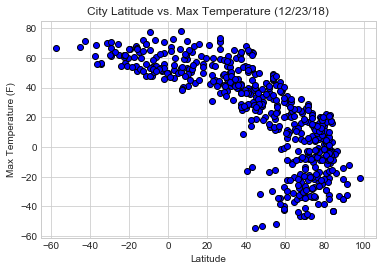

In [9]:
plt.title("City Latitude vs. Max Temperature (12/23/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(temps, lats, marker="o", facecolors="blue", edgecolors="black") 

# Save Figure
plt.savefig("../Images/citylat_maxtemp.png")

#### Latitude vs. Humidity Plot

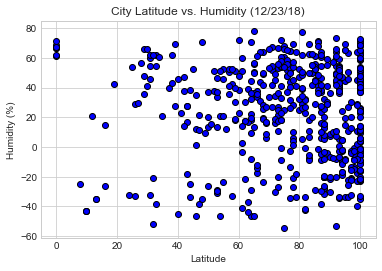

In [10]:
plt.title("City Latitude vs. Humidity (12/23/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(humidity, lats, marker="o", facecolors="blue", edgecolors="black") 

# Save Figure
plt.savefig("../Images/citylat_humidity.png")  

#### Latitude vs. Cloudiness Plot

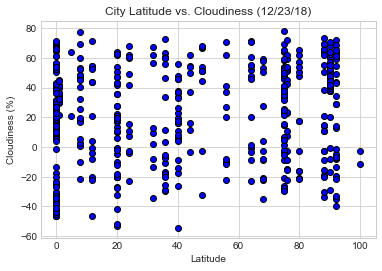

In [11]:
plt.title("City Latitude vs. Cloudiness (12/23/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(cloudiness, lats, marker="o", facecolors="blue", edgecolors="black") 

# Save Figure
plt.savefig("../Images/citylat_cloudiness.png")

#### Latitude vs. Wind Speed Plot

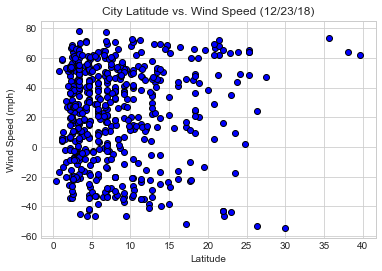

In [12]:
plt.title("City Latitude vs. Wind Speed (12/23/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.scatter(windspeed, lats, marker="o", facecolors="blue", edgecolors="black")

# Save Figure
plt.savefig("../Images/citylat_windspeed.png")